In [1]:
#--- ref: goo.gl/r3HQNE
#--- ref: Jupyter / IPython: After editing a module, changes are not effective without kernel restart
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [22]:
import mfnn_factory as fac
import mfnn_plot as plt

#--- create data sets
training_data, validation_data, test_data = fac.create_np_data_sets()
inputs, targets = training_data

#--- create neural network
mfnn = fac.create_mfnn(input_size=inputs.shape[2])
mfnn.summary()

#--- train the neural network
training_losses, validation_losses = mfnn.fit(inputs, targets, 
                              learning_rate=0.1, epochs=600, batch_size=128, 
                              validation_data=validation_data)

---------------------------------------
Neural network layers (inputs, outputs)
---------------------------------------
Dense: (58, 32)
Sigmoid Activation: (32, 32)
Dense: (32, 1)
Activation(Default Linear): (1, 1)
---------------------------------------


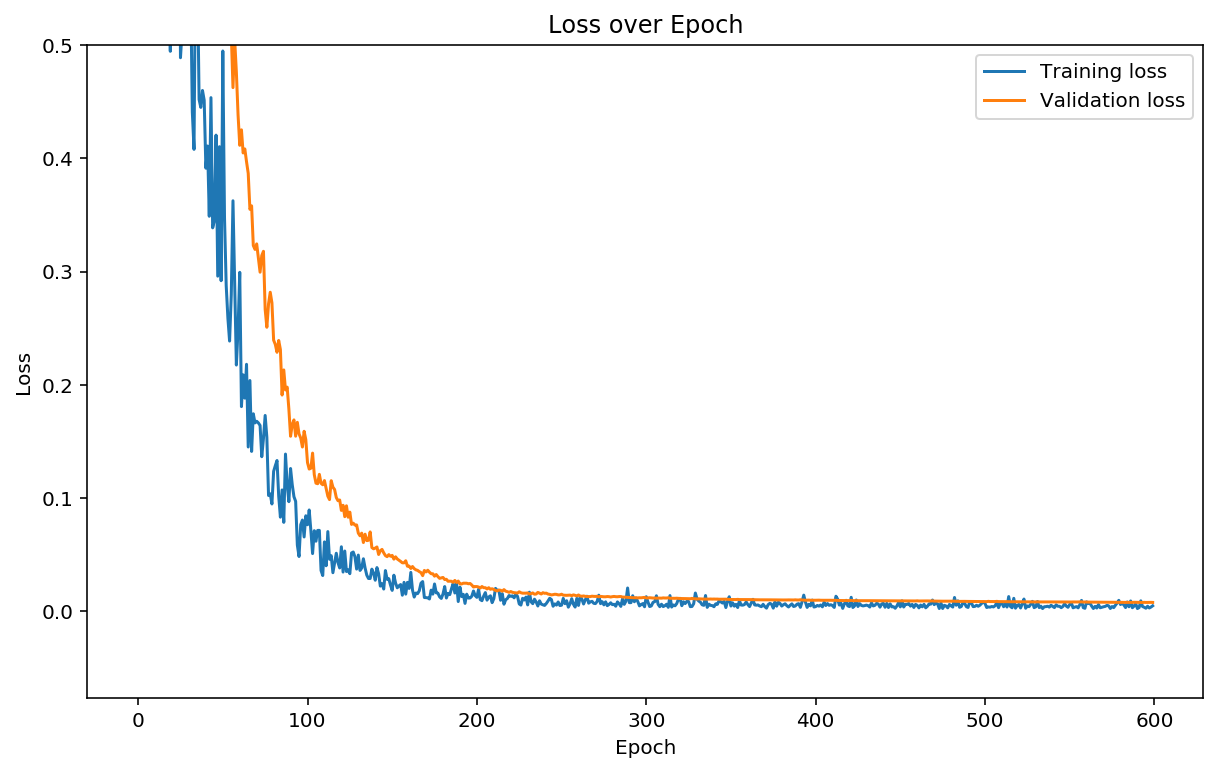

In [23]:
#--- display the training loss over epoch
plt.plot_losses(training_losses, validation_losses)


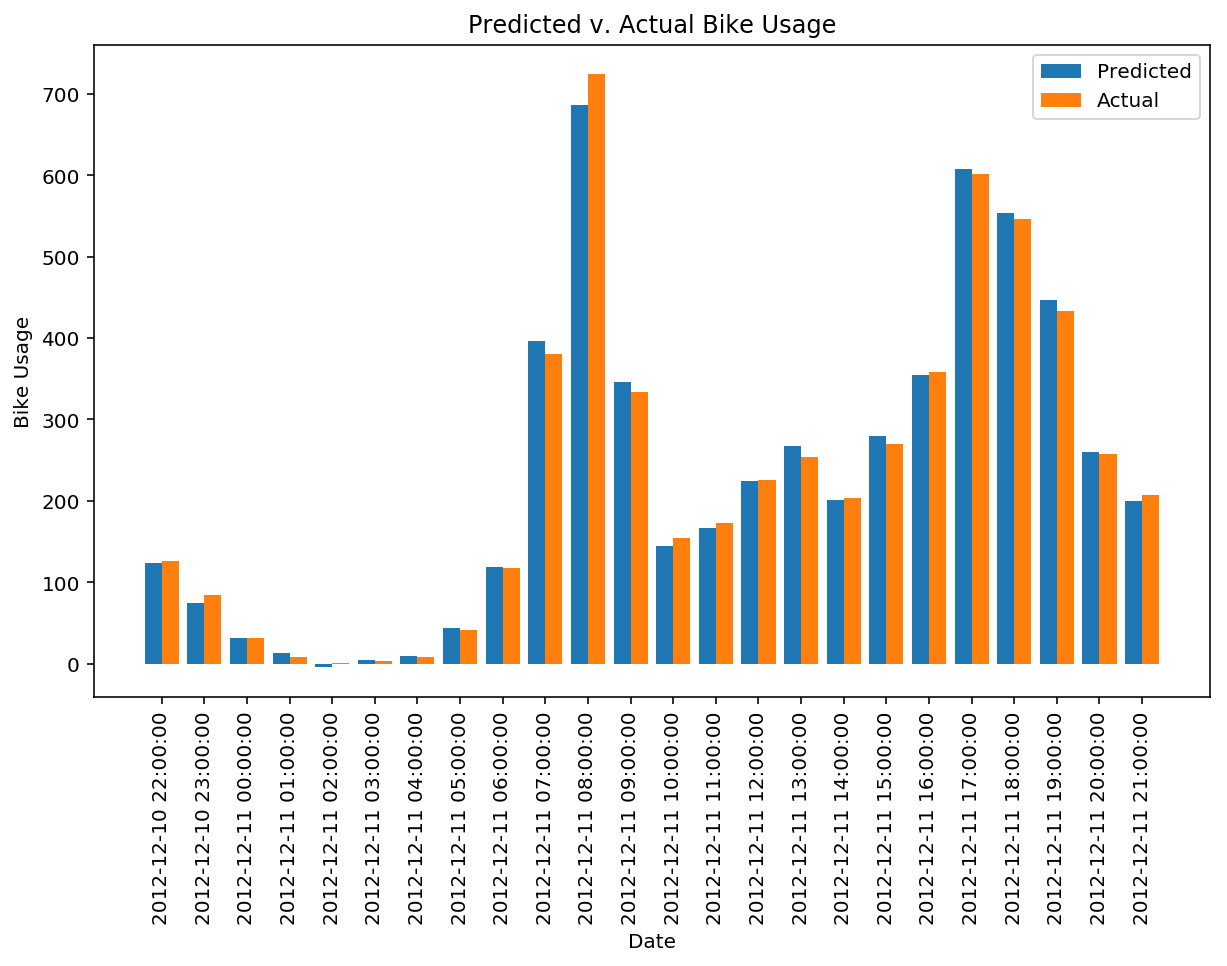

In [34]:
#--- display predicted vs actual usage for 24 hours in a bar chart
test_inputs, test_targets, datetimes, mean, std = test_data
predictions = mfnn.predict_on_batch(test_inputs)

predicted_values = predictions * std + mean
actual_values    = test_targets * std + mean
hours=24
plt.plot_predictions_bar(predicted_values[:hours], actual_values[:hours], datetimes[:hours])


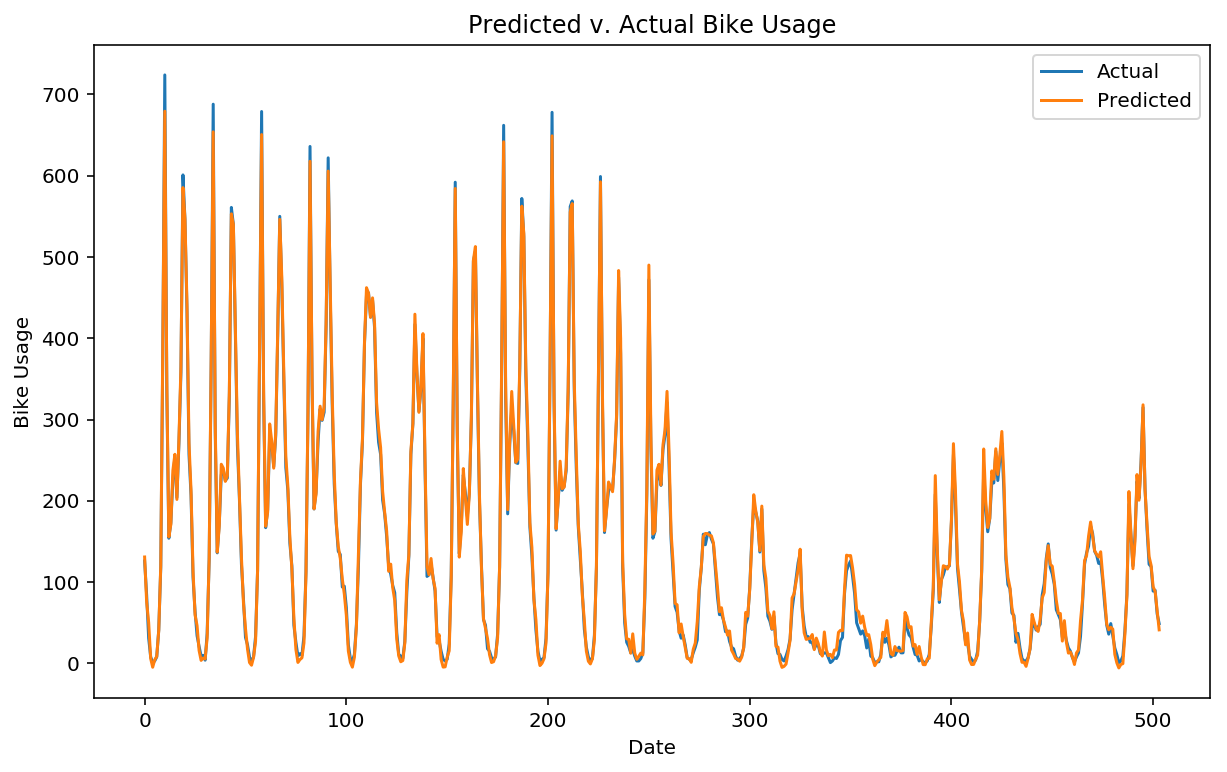

In [5]:
#--- display predicted vs actual usage for all data on a line chart
plt.plot_predictions_line(predicted_values, actual_values)